# 6.4 Supervised Machine Learning: Regression

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [14]:
 # Defining path
path = r'C:\Users\swapn\World Happiness Report'

In [16]:
# Importing dataframe 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'exploring relationship_dataset.csv'), index_col = False)

In [20]:
df.head()

,Rank,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Donations to Charity,Happiness Status
0,1,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Happy Country
1,2,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Happy Country
2,3,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Happy Country
3,4,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Happy Country
4,5,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Happy Country


In [22]:
df.shape

(1359, 12)

# Data cleaning


In [24]:
# Check for missing values
df.isnull().sum()

Rank                             0
Year                             0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom (Life Choices)           0
Trust (Government Corruption)    0
Donations to Charity             0
Happiness Status                 0
dtype: int64

In [26]:
# Check for dulicates
df_dup = df.duplicated()

In [28]:
df_dup.shape

(1359,)

C:\Users\swapn\AppData\Local\Temp\ipykernel_18916\70369954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins = 20)


<Axes: xlabel='Happiness Score', ylabel='Density'>

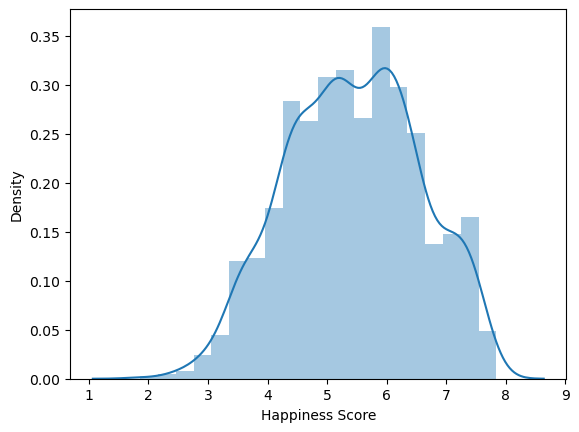

In [30]:
# Check for extreme values
sns.distplot(df['Happiness Score'], bins = 20)

In [32]:
# Check the mean 
df['Happiness Score'].mean()

5.4402727734812055

In [34]:
# Check the median
df['Happiness Score'].median()

5.456200123

In [36]:
# Check the max 
df['Happiness Score'].max()

7.842

In [38]:
# No extreme values have been found 

# Data Prep for Regression Analysis


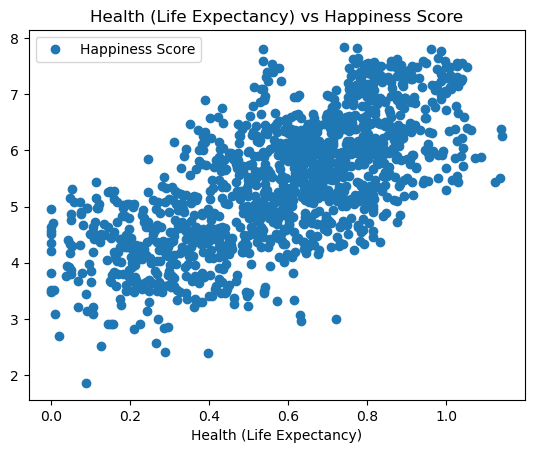

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'Health (Life Expectancy)', y = 'Happiness Score', style ='o')
plt.title('Health (Life Expectancy) vs Happiness Score')
plt.xlabel = 'Health (Life Expectancy)'
plt.ylabel = 'Happiness Score'
plt.show()

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['Health (Life Expectancy)'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [44]:
X

array([[0.94143],
       [0.94784],
       [0.87464],
       ...,
       [0.092  ],
       [0.398  ],
       [0.087  ]])

In [46]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [48]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [50]:
# As per my hypothesis, country will classify as a "Happy Country" if theirscore Health (Life Expectancy) in greater than 0.5.


In [52]:
# Group the Happiness Status and Happiness Score to find out what the minimum score is for a 'happy country'
df.groupby('Happiness Status').agg({'Happiness Score': ['min', 'max']})


Happiness Score        
                                   min     max
Happiness Status                              
Happy Country                    6.000  7.8420
Somewhat Happy Country           4.015  5.9988
Unhappy Country                  1.859  3.9990

In [54]:
# Country with a happiness score below 6.000 is not considered a "Happy Country".


# Regression Analysis


In [56]:
# Create a regression object
regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [58]:
# Fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [60]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

TypeError: 'str' object is not callable

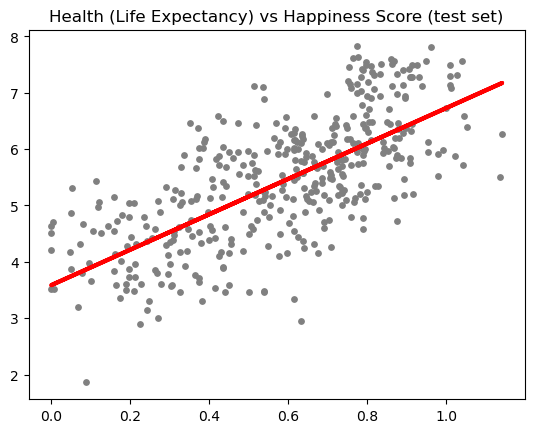

In [62]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Health (Life Expectancy) vs Happiness Score (test set)')
plot_test.xlabel('Health (Life Expectancy)')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [64]:
# Reload the library as Line 14 already includes plt.xlabel and plt.ylabel. Cannot label the below plot without getting an error.
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

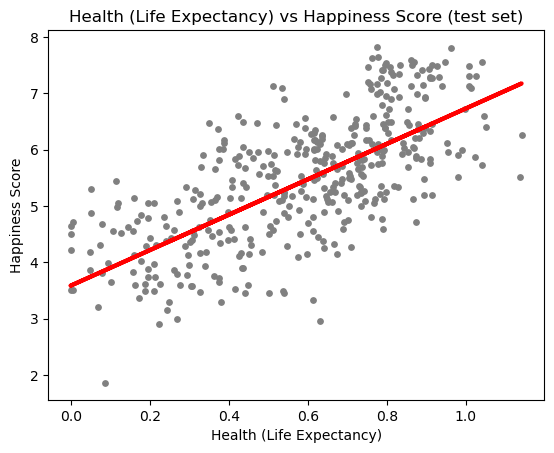

In [66]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Health (Life Expectancy) vs Happiness Score (test set)')
plot_test.xlabel('Health (Life Expectancy)')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [68]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [70]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.14453304]]
Mean squared error:  0.6583414160550851
R2 score:  0.4768855763292986


In [72]:
# Interpretation: There is a positive relationship between Health (Life Expectancy) and a country's happiness score. This confirms my hypothesis that a happy country will have a Health (Life Expectancy) score of 0.5 or higher. The positive relationship shown by the positive slope indicates that the higher the health score, the highter will be the Happness score. The MSE is 0.61, indicating that the regression line passes fairly close to the regression line. The graph shows that many points are scattered, a linear regression model may not be the best fit for this analyis. Additionally, the R2 score is a small score of 0.52, indicating that this regression analysis is a fairly fit for this analysis.


In [74]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.3770,6.405704
1,6.2930,6.386837
2,5.7160,5.113301
3,4.1514,5.462065
4,6.9396,6.200108
5,7.0970,5.267383
6,5.5104,7.159231
7,6.7140,6.117463
8,7.4870,6.500040
9,5.4660,4.868027


# Regressional Analysis vs Training Set


In [77]:
# Predict the X_train
y_predicted_train = regression.predict(X_train)

In [79]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [81]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.14453304]]
Mean squared error:  0.6700118137109662
R2 score:  0.46267541230343134


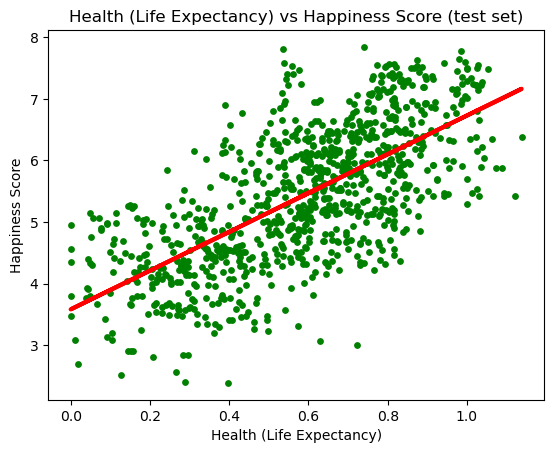

In [83]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Health (Life Expectancy) vs Happiness Score (test set)')
plot_test.xlabel('Health (Life Expectancy)')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [85]:
# Comparing the model summary statistics for both the test and training sets, we see that the numbers do not vary much. 
# The slope remains 3.36, the MSE has a 0.047 difference, and the R2 score has a 0.01 difference. This means that it does not overfit the model.
# We can see that there is variance within the data points. The health (Life Expectancy) as one factor impacting the Happiness score is not enough to predict a country's happiness score. We need to further analyze more factors affecting the Happiness score.
